In [1]:
using Pkg
Pkg.activate("..")   

  Activating project at `d:\GitHubProjects\GeneralisedKoornwinderPolynomials.jl`


In [2]:
using GeneralisedKoornwinderPolynomials, LinearAlgebra, Plots
using SparseArrays, BlockBandedMatrices, BlockArrays, StaticArrays

α, β, γ, δ, θ, ϵ = -0.4, 1.0, -0.2, 1.0, 8, 0

ρ(x)  = 1- 4*x^4 + 3*x^2
dρ(x) = -16*x^3 + 6*x
Fρ1(x) = (1- 4*x^4 + 3*x^2)^2
Fρ2(x) = (1- 4*x^4 + 3*x^2) * (-16*x^3 + 6*x) 

gkd1 = GeneralisedKoornwinderDomain(α, β, γ, δ, ρ, θ, ϵ, dρ, Fρ1, Fρ2)

GeneralisedKoornwinderDomain(-0.4, 1.0, -0.2, 1.0, Main.ρ, 8, 0, Main.dρ, Main.Fρ1, Main.Fρ2)

In [3]:
N = 500

ops1 = Semiclassical_Operatormatrices(gkd1, 0, 0, 0, 0, N)

Laplacian_W = Koornwinder_Laplacian(gkd1, ops1, N)     # Δ_{W,(1,1,1,1)}^{(1,1,1,1)}
JX = Koornwinder_Multiplication_X(ops1, N)             # J_x^{(0,0,0,0)} 
JY = Koornwinder_Multiplication_Y(gkd1, ops1, N)       # J_y^{(0,0,0,0)} 
HNW2 = Koornwinder_Conversion_NW2(gkd1, ops1, N)       # T_{(0,0,0,0)}^{(1,1,1,1)}
HW2  = Koornwinder_Conversion_W2(gkd1, ops1, N)        # T_{W,(1,1,1,1)}^{(0,0,0,0)}

Helmholtz_W = Laplacian_W + 100^2 * HNW2 * (I - 3 * (JX - 0.2*I)^2 - 2 * (JY - 0.4*I)^2 ) * HW2  # 1 - [3(x-0.2)²+2(y-0.4)²]

501×501-blocked 125751×125751 BandedBlockBandedMatrix{Float64} with block-bandwidths (30, 30) and sub-block-bandwidths block-bandwidths (4, 4) with data 61×501-blocked 549×125751 BlockedMatrix{Float64}:
  864.922   │  -217.213   -415.491  │  -603.022 
 ───────────┼───────────────────────┼───────────  …      ⋅          │     ⋅        
 ───────────────┼──────────────
 -217.213   │   333.657   -217.648  │   -17.1269         ⋅          │     ⋅        
 -415.491   │  -217.648    114.97   │    49.925 
 ───────────┼───────────────────────┼───────────         ⋅          │     ⋅        
 ───────────────┼──────────────
 -603.022   │   -17.1269    49.925  │   451.75           ⋅          │     ⋅        
 -150.658   │  -176.225   -318.004  │   -72.0644         ⋅          │     ⋅        
 -633.824   │  -168.06    -302.193  │   205.771 
 ───────────┼───────────────────────┼───────────  …      ⋅          │     ⋅        
 ───────────────┼──────────────
  -35.3456  │  -413.59     192.415  │   -79.8153  

In [4]:
f_RHS1(x,y) = 1 
f_RHS2(x,y) = (1 - x) * (x + 0.4) * (y + 0.2*ρ(x)) * (ρ(x) - y) * exp(x)
f_RHS3(x,y) = (1 - x) * (x + 0.4) * (y + 0.2*ρ(x)) * (ρ(x) - y) * sin(x*y) 
f_RHS4(x,y) = exp(-200*((x-0.5)^2+(y-0.5)^2))  

koornwinder_coef_f1 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS1, 1, 1, 1, 1, N)
koornwinder_coef_f2 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS2, 1, 1, 1, 1, N)
koornwinder_coef_f3 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS3, 1, 1, 1, 1, N)
koornwinder_coef_f4 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS4, 1, 1, 1, 1, N)

501-blocked 125751-element BlockedVector{Float64}:
  0.010619497680989786 
 ──────────────────────
  0.004049210402966135 
 -0.002825076602609055 
 ──────────────────────
 -0.005139994805086302 
 -0.0006767947635991467
 -0.010759557063893347 
 ──────────────────────
 -0.00760347125357105  
  0.0013507361555767311
 -0.0005126724704144893
  0.005488552903522588 
 ──────────────────────
  ⋮
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
  0.0                  

In [ ]:
GC.gc()
koornwinder_coef_u1  = Helmholtz_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f1[Block.(1:401)]
koornwinder_coef_u2 =  Helmholtz_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f2[Block.(1:401)]
koornwinder_coef_u3 =  Helmholtz_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f3[Block.(1:401)]
koornwinder_coef_u4 =  Helmholtz_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f4[Block.(1:401)]

401-blocked 80601-element BlockedVector{Float64}:
  4.324572442669036e-6  
 ───────────────────────
  1.7704902465809598e-6 
 -1.1745694035680224e-6 
 ───────────────────────
 -2.063720092812557e-6  
 -2.9699927413057107e-7 
 -4.504141691758614e-6  
 ───────────────────────
 -3.173272701539813e-6  
  5.375188363267189e-7  
 -2.4923520189336764e-7 
  2.3630593303974896e-6 
 ───────────────────────
  ⋮
  5.104141727423238e-38 
 -3.503572626956234e-38 
  1.7668019890557798e-39
  4.291039067848114e-40 
 -1.1921656180302543e-40
  6.734217109886577e-41 
 -1.1787951614344705e-42
 -3.998653694321774e-42 
  1.5866946294303982e-43

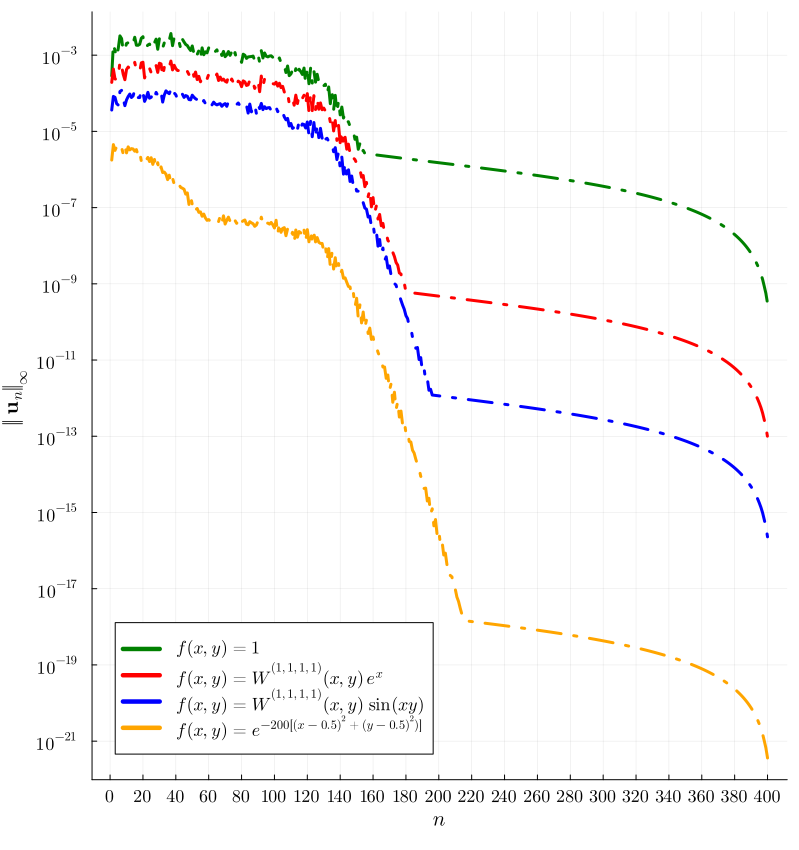

In [6]:
x_vals = 1:400
y_vals11 = zeros(length(x_vals))
y_vals22 = zeros(length(x_vals))
y_vals33 = zeros(length(x_vals))
y_vals44 = zeros(length(x_vals))

for i in 1:length(x_vals)
    n = x_vals[i] 
    y_vals11[i] = norm(koornwinder_coef_u1[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals22[i] = norm(koornwinder_coef_u2[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals33[i] = norm(koornwinder_coef_u3[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals44[i] = norm(koornwinder_coef_u4[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
end

xtick_exponents = 0:20:400
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -3:-2:-21
ytick_vals = 10.0 .^ ytick_exponents
ytick_labels = ["\$10^{$(y)}\$" for y in ytick_exponents]

plot(
    x_vals, y_vals11;
    #xaxis = :log10,
    size = (800,850),
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :green,
    marker = :none, 
    label = "\$f(x,y)=1\$",
    legend = :bottomleft,
    tickfontsize = 12,
    legendfontsize = 12,
    guidefontsize = 14
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals22;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :red,
    marker = :none,
    label = "\$f(x,y)= W^{(1,1,1,1)}(x,y)\\, e^x \$",
    legend = :bottomleft
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals33;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :blue,
    marker = :none,
    label = "\$f(x,y)= W^{(1,1,1,1)}(x,y)\\, \\sin(xy) \$",
    legend = :bottomleft
    #legend_position =(0.47, 0.45)
)


plot!(
    x_vals, y_vals44;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :orange,
    marker = :none,
    label = "\$f(x,y) = e^{-200[(x-0.5)^2+(y-0.5)^2)]} \$",
    legend = :bottomleft
    #legend_position =(0.47, 0.45)
)

In [ ]:
u_approx2 = Koornwinder_synthesis_transform(gkd1, ops1, koornwinder_coef_u2, 1, 1, 1, 1, 200)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(-0.41, 1.66, length=100)  
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if -0.2* ρ(x) <= y <= 1 * ρ(x)
            z_vals1[i, j] = u_approx2(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

xtick_exponents = -0.4:0.2:1.0
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = 0.0:0.5:1.5
ytick_vals = ytick_exponents
ytick_labels = ["\${$(y)}\$" for y in ytick_exponents]


contourf(
    x_vals1, y_vals1, z_vals1' .* 1e3;

    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    framestyle = :box,
    color = :inferno,
    linewidth = 0,
    levels = 100,
    xlabel = "\$x\$",
    ylabel = "\$y\$",
    aspect_ratio = :equal,
    xlims = (α, β),
    ylims = (-0.41, 1.66),
    size = (700, 850),
    grid = false,

    tickfont = font(10),
    guidefont = font(14),
        
)

x_edge = range(α, β, length=1200)
y_top = δ * real.(ρ.(x_edge))
y_bottom = γ * real.(ρ.(x_edge))

y_left = [γ * real(ρ(α)), δ * real(ρ(α))]
y_right = [γ * real(ρ(β)), δ * real(ρ(β))]
plot!(x_edge, y_top, color=:black, lw=1.0, label=false)
plot!(x_edge, y_bottom, color=:black, lw=1.0, label=false)

plot!([α, α], y_left, color=:black, lw=1.0, label=false)
plot!([β, β], y_right, color=:black, lw=1.0, label=false)
annotate!(1.09, -0.45, Plots.text("\$\\times \\, 10^{-3}\$", :left, 14))

![](VestDomain_Helmholtz.png)